# DIP Project
NS Muhammad Taimoor Azam

NS Muhammad Abduallah (372567)

PC Zarar Shah

NS Syed Muhammad Irtaza Hyder (378514)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import numpy as np
from skimage.feature import hog
from skimage import io, transform
import matplotlib.pyplot as plt
import random
import joblib
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsRestClassifier
import cv2
from imutils.object_detection import non_max_suppression

*italicized text*## STEP 1: Data Cleaning
Plan:
1. CCA with stats to get pixels and generate bounding box
2. Generalize set of sizes + orientations for the bounding box, similar to that of YOLO
3. Implement HoG based on those bounding boxes.

In [ ]:
!unzip /content/drive/MyDrive/train.zip -d .
!unzip /content/drive/MyDrive/test.zip -d .

Streaming output truncated to the last 5000 lines.
  inflating: ./train/Safe/N0000007_15.png  
  inflating: ./train/Safe/N0000091_3.png  
  inflating: ./train/Safe/N0000009_38.png  
  inflating: ./train/Safe/N0000048_64.png  
  inflating: ./train/Safe/N0000067_87.png  
  inflating: ./train/Safe/N0000046_49.png  
  inflating: ./train/Safe/N0000014_69.png  
  inflating: ./train/Safe/N0000052_28.png  
  inflating: ./train/Safe/N0000107_15.png  
  inflating: ./train/Safe/N0000109_38.png  
  inflating: ./train/Safe/N0000048_70.png  
  inflating: ./train/Safe/N0000085_16.png  
  inflating: ./train/Safe/N0000041_54.png  
  inflating: ./train/Safe/N0000082_9.png  
  inflating: ./train/Safe/N0000098_47.png  
  inflating: ./train/Safe/N0000055_21.png  
  inflating: ./train/Safe/N0000004_87.png  
  inflating: ./train/Safe/N0000025_49.png  
  inflating: ./train/Safe/N0000038_18.png  
  inflating: ./train/Safe/N0000036_35.png  
  inflating: ./train/Safe/N0000070_60.png  
  inflating: ./train/Safe/N

# STEP 2: Classification

## **Convolutional Neural Network**

In [ ]:
import numpy as np
import tensorflow as tf
import math
import os
from tensorflow.keras.models import *
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.losses import *
from tensorflow.keras.preprocessing.image import *
import cv2, csv

In [ ]:
#For new Dataset
labels = "D:\\Users\\Taimoor\\Videos\\DIPset_no_Shuriken\\ThreatDatasetTrain.csv"
LabelFile = open(labels, 'r')
csvFile = csv.reader(LabelFile)

origdir = "D:\\Users\\Taimoor\\Videos\\DIPset_no_Shuriken\\"
train_img = np.zeros([711, 288, 384, 3], dtype = np.uint8)
train_label = np.zeros([711, 2], dtype = np.uint8)

img_count = -1
for lines in csvFile:

    if (img_count == -1):
        img_count = img_count + 1
        continue

    img = cv2.imread(os.path.join(origdir, lines[1]), 1)

    if (img is None):
        continue

    img = cv2.resize(img, [384,288])
    train_label[img_count] = lines[3:]
    train_img[img_count,...] = img
    img_count = img_count + 1

print(img_count)

In [ ]:
classes = 2
# creating model
inputs = Input((288, 384, 3))
conv1 = Conv2D(8, 3, activation='relu', padding='same')(inputs)
conv1 = BatchNormalization()(conv1)
pool1 = MaxPooling2D(pool_size=(2,2))(conv1)
conv2 = Conv2D(16, 3, activation='relu', padding='same')(pool1)
conv2 = BatchNormalization()(conv2)
pool2 = MaxPooling2D(pool_size=(2,2))(conv2)
conv3 = Conv2D(32, 3, activation='relu', padding='same')(pool2)
conv3 = BatchNormalization()(conv3)
pool3 = MaxPooling2D(pool_size=(2,2))(conv3)
conv4 = Conv2D(64, 3, activation='relu', padding='same')(pool3)
conv4 = BatchNormalization()(conv4)
pool4 = MaxPooling2D(pool_size=(2,2))(conv4)
conv5 = Conv2D(128, 3, activation='relu', padding='same')(pool3)
conv5 = BatchNormalization()(conv5)
drop5 = Dropout(0.25)(conv5)
x = Flatten()(drop5)
x = Dense(128, activation='relu', name='Dense_1', dtype='float32')(x)
x = Dense(64, activation='relu', name='Dense_2', dtype='float32')(x)
x = Dense(8, activation='relu', name='Dense_3', dtype='float32')(x)
x = Dense(classes, activation='sigmoid', name='Output', dtype='float32')(x)
my_model = Model(inputs=[inputs], outputs=[x])
my_optimizer = Adam(learning_rate=0.0001)
my_model.compile(loss='binary_crossentropy', optimizer=my_optimizer, metrics=['categorical_accuracy'])
my_model.summary()

In [ ]:
my_model_ = my_model.fit(x=train_img, y=train_label, batch_size=16, epochs=10, shuffle = True)

In [ ]:
my_model.save('DIPProj.keras')

In [ ]:
my_model = load_model('DIPProj.keras')

## **CNN Testing**

In [ ]:
#This is for the new dataset
test_img = np.zeros([179, 288, 384, 3], dtype = np.uint8)
test_label = np.zeros([179, 2], dtype = np.uint8)

origdir = "D:\\Users\\Taimoor\\Videos\\DIPset_no_Shuriken\\"
labels = "D:\\Users\\Taimoor\\Videos\\DIPset_no_Shuriken\\TestDataset.csv"
LabelFile = open(labels, 'r')
csvFile = csv.reader(LabelFile)

img_count = -1
for lines in csvFile:

    if (img_count == -1):
        img_count = img_count + 1
        continue

    img = cv2.imread(os.path.join(origdir, lines[1]), 1)

    if (img is None):
        continue

    img = cv2.resize(img, [384,288])
    test_label[img_count] = lines[3:]
    test_img[img_count,...] = img

    img_count = img_count + 1



my_predictions = my_model.predict(test_img)
'''for i in range(0,len(my_predictions)):
    print(i)
    print(my_predictions[i])'''

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics

actual = test_label
predicted = my_predictions > 0.8

confusion_matrix = metrics.multilabel_confusion_matrix(actual, predicted)

print(confusion_matrix)

for i in range(2):
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix[i], display_labels = [0, 1])
    cm_display.plot()

## **Training SVM**

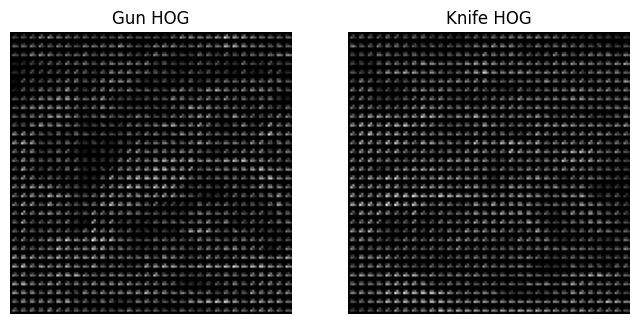

In [ ]:
# training SVM

# Defining params
orientation_bins = 9
pixels_per_cell = (4, 4)
cells_per_block = (4, 4)
(winH, winW) = (128, 128)
windowSize = (winH, winW)
# the sliced windows will be the same (128, 128) size
# in that way the HOG descriptor will be the same

path2topG = "/content/train/Guns"    # path to images with guns (only guns)
path2topK = "/content/train/Knife"    # path to images with knife (only knives)
path2safe = "/content/train/Safe"    # path to images without any threat in them
# acha one thing i forgot to mention is the images for training should all be
# the same size so that their HOG descriptor is also of the same dims
# therefore i guess we should work on making appropriate data for training SVM
# one way is croping images to 128x128 size, i suppose

hog_features = []
hogIms = []
labels = []

def process_images(image_path:str, label:int) -> None:
    image_files = os.listdir(image_path)
    if image_path == path2safe:
        image_files = random.sample(image_files, 300)
    for file in image_files:
        img = cv2.imread(os.path.join(image_path, file), 0)
        if img is None:
            continue
        _, img = cv2.threshold(img, 0, 255, cv2.THRESH_OTSU)
        if windowSize != img.shape[:2]:
            img = cv2.resize(img, windowSize)
        fd, im = hog (
            img, orientations=orientation_bins,
            pixels_per_cell=pixels_per_cell,
            cells_per_block=cells_per_block,
            block_norm='L2',
            visualize=True
            )
        hogIms.append(im)
        hog_features.append(fd)
        labels.append(label)

process_images(path2topG, 1)    # label '1' for guns
process_images(path2topK, 2)    # label '2' for knife
# process_images(path2safe, 0)    # label '0' for safe images

labels = np.array(labels)
hogIms = np.array(hogIms)
mean_gun_hog = np.mean(hogIms[labels == 1], axis=0)
mean_knife_hog = np.mean(hogIms[labels == 2], axis=0)

fig, axes = plt.subplots(1, 2, figsize=(8, 4))

axes[0].axis('off')
axes[0].set_title("Gun HOG")
axes[0].imshow(
    mean_gun_hog, cmap="gray"
)
axes[1].axis('off')
axes[1].set_title("Knife HOG")
axes[1].imshow(
    mean_knife_hog, cmap="gray"
)

plt.show()

In [ ]:
# clean up some space
del hog_features
del labels

## **SVM Testing**

In [ ]:
def sliding_window(image, stepSize, windowSize):
    (x, y) = windowSize
    for i in range(0, image.shape[0] - x, stepSize):
        for j in range(0, image.shape[1] - y, stepSize):
            yield (i, j, image[i: i + x, j: j + y])

Detection:: Location -> (100, 430)
Scale ->  0 | Confidence Score 0.6749645622807018 

Detection:: Location -> (100, 440)
Scale ->  0 | Confidence Score 0.6690723821535672 

Detection:: Location -> (100, 450)
Scale ->  0 | Confidence Score 0.6661414539902896 

Detection:: Location -> (100, 460)
Scale ->  0 | Confidence Score 0.6058913742615112 

Detection:: Location -> (100, 480)
Scale ->  0 | Confidence Score 0.6647637795001359 

Detection:: Location -> (100, 490)
Scale ->  0 | Confidence Score 0.6237621671698389 

Detection:: Location -> (100, 500)
Scale ->  0 | Confidence Score 0.6800837107441043 

Detection:: Location -> (100, 510)
Scale ->  0 | Confidence Score 0.686512347558743 

Detection:: Location -> (100, 520)
Scale ->  0 | Confidence Score 0.6816448111615084 

Detection:: Location -> (100, 530)
Scale ->  0 | Confidence Score 0.7047098409223843 

Detection:: Location -> (110, 430)
Scale ->  0 | Confidence Score 0.6115884071169556 

Detection:: Location -> (110, 450)
Scale -> 

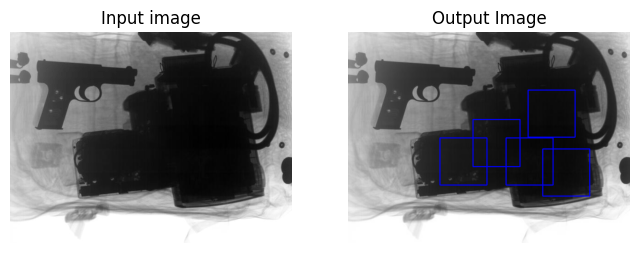

In [ ]:
image = cv2.imread("/content/test/gun/B0011_0001.png")
img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

threshold = 0.6
dsc = 0     # dsc = down scale counter; counts the number of time downscaling happened
downscale = 1.5
detections = []

for resized in transform.pyramid_gaussian(img, downscale=downscale):
    if all(x1 > x2 for x1, x2 in zip(windowSize, resized.shape[:2])):
        break
    for (x, y, window) in sliding_window(resized, stepSize=10, windowSize=windowSize):
        fd = hog (
                window,
                orientation_bins,
                pixels_per_cell,
                cells_per_block,
                block_norm='L2'
            )
        fd = fd.reshape(1, -1)
        pred = model.predict(fd)

        decision_function_values = model.decision_function(fd)
        max_confidence_index = np.argmax(decision_function_values)
        max_confidence_value = decision_function_values[0][max_confidence_index]

        if max_confidence_index == 2:
            continue    # window has no threats

        if max_confidence_value > threshold:  # Compare the highest confidence score with the threshold
            print(f"Detection:: Location -> ({x}, {y})")
            print(f"Scale ->  {dsc} | Confidence Score {max_confidence_value} \n")
            detections.append (
                (
                int(x * (downscale**dsc)),
                int(y * (downscale**dsc)),
                max_confidence_value,
                int(windowSize[0] * (downscale**dsc)),
                int(windowSize[1] * (downscale**dsc))
                )
            )
    dsc += 1

# Apply non-maximum suppression
rects = np.array([[y, x, y + h, x + w] for (x, y, _, w, h) in detections])
sc = np.array([score for (_, _, score, _, _) in detections])
pick = non_max_suppression(rects, probs=sc, overlapThresh=0.2)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(img, cmap=plt.cm.gray)
ax1.set_title('Input image')

# Draw the final bounding boxes
for (xA, yA, xB, yB) in pick:
    cv2.rectangle(image, (xA, yA), (xB, yB), (0, 0, 255), 2)

ax2.axis('off')
ax2.imshow(image, cmap=plt.cm.gray)
ax2.set_title('Output Image')
plt.show()

# STEP 3: Segmentation/Bounding Boxes

In [ ]:
# Unzipping data
!unzip /content/drive/MyDrive/Datasets/'DIP Dataset'/Project/'New Data'/edges_combined.zip -d .
!unzip /content/drive/MyDrive/Datasets/'DIP Dataset'/Project/'New Data'/students_data.zip -d .
!unzip /content/drive/MyDrive/Datasets/'DIP Dataset'/Project/'New Data'/thresholded_images.zip -d .

Archive:  /content/drive/MyDrive/Datasets/DIP Dataset/Project/New Data/edges_combined.zip
replace ./edges_combined/B0008_0005.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: ./edges_combined/B0008_0005.png  
  inflating: ./edges_combined/B0008_0006.png  
  inflating: ./edges_combined/B0008_0007.png  
  inflating: ./edges_combined/B0008_0008.png  
  inflating: ./edges_combined/B0008_0009.png  
  inflating: ./edges_combined/B0008_0010.png  
  inflating: ./edges_combined/B0008_0011.png  
  inflating: ./edges_combined/B0008_0012.png  
  inflating: ./edges_combined/B0008_0013.png  
  inflating: ./edges_combined/B0008_0014.png  
  inflating: ./edges_combined/B0008_0015.png  
  inflating: ./edges_combined/B0008_0016.png  
  inflating: ./edges_combined/B0008_0019.png  
  inflating: ./edges_combined/B0008_0020.png  
  inflating: ./edges_combined/B0008_0023.png  
  inflating: ./edges_combined/B0008_0024.png  
  inflating: ./edges_combined/B0008_0025.png  
  inflating: ./edges_combined/

In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Datasets/DIP Dataset/Project/New Data/ThreatDatasetTrain.csv')
df.head()

,Unnamed: 0,image_path,mask_path,GUN,KNIFE
0,0,students_data\train\gun\B0014_0001.png,students_data\train\annotations\gun\B0014_0001...,1,0
1,1,students_data\train\gun\B0014_0003.png,students_data\train\annotations\gun\B0014_0003...,1,0
2,2,students_data\train\gun\B0017_0001.png,students_data\train\annotations\gun\B0017_0001...,1,0
3,3,students_data\train\gun\B0018_0001.png,students_data\train\annotations\gun\B0018_0001...,1,0
4,4,students_data\train\gun\B0018_0003.png,students_data\train\annotations\gun\B0018_0003...,1,0


In [ ]:
df.shape

(677, 5)

# U Net for Segmentation

In [ ]:
!pip install numpy opencv-python tensorflow keras

  Cloning https://github.com/matterport/Mask_RCNN.git to /tmp/pip-req-build-9oufvyxd
  Running command git clone --filter=blob:none --quiet https://github.com/matterport/Mask_RCNN.git /tmp/pip-req-build-9oufvyxd
  Resolved https://github.com/matterport/Mask_RCNN.git to commit 3deaec5d902d16e1daf56b62d5971d428dc920bc
  Preparing metadata (setup.py) ... done
  Created wheel for mask-rcnn: filename=mask_rcnn-2.1-py3-none-any.whl size=56921 sha256=4f2db83fa7e4b233939abf0d40822c0f3a8c411209643e7252ea78fd99e102fa
  Stored in directory: /tmp/pip-ephem-wheel-cache-vmil7fu4/wheels/63/8e/bf/ef4901e305146aa3a21fbbaac877c3a204180eca9a71c8e291
Successfully built mask-rcnn


In [ ]:
# Making a mask folder for gun
import shutil
import cv2

mask_dir = "/content/image_masks"
image_dir = "/content/image_edges"

mask_given = no_mask = 0
df_guns = df[((df['GUN'] == 1) & (df['KNIFE'] == 0))] # | ((df['GUN'] == 0) & (df['KNIFE'] == 0))]
# Clearing image_masks if it has any file
for filename in os.listdir(mask_dir):
    file_path = os.path.join(mask_dir, filename)
    img_path = os.path.join(image_dir, filename)
    if os.path.isfile(file_path) or os.path.islink(file_path):
        os.unlink(file_path)
        if os.path.exists(img_path):
          os.unlink(img_path)
    elif os.path.isdir(file_path):
        shutil.rmtree(file_path)
        shutil.rmtree(img_path)

for i in range(0, df_guns.shape[0]):
  mask_path = df_guns['mask_path'].iloc[i]
  filename = os.path.join('/content', df_guns.iloc[i].image_path.replace('\\', '/'))

  if pd.isna(mask_path):
    img = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)
    mask = np.zeros(img.shape)
    cv2.imwrite(os.path.join(mask_dir, filename.split('/')[-1]), mask)
    no_mask += 1
    continue
  else:
    shutil.copy(mask_path.replace('\\', '/'), mask_dir)
    mask_given += 1
  shutil.copy(os.path.join('/content/thresholded_images', filename.split('/')[-1]), image_dir)
print(f'Threat: {mask_given}\nSafe: {no_mask}')

Threat: 235
Safe: 0


In [ ]:
import os
import numpy as np
import cv2
from tensorflow.keras.utils import Sequence

class ImageMaskGenerator(Sequence):
    def __init__(self, image_dir, mask_dir, image_size=(128, 128, 3), batch_size=8, shuffle=True):
        self.image_dir = image_dir
        self.mask_dir = mask_dir
        self.image_size = image_size
        self.batch_size = batch_size
        self.shuffle = shuffle
        self.image_ids = os.listdir(image_dir)
        self.on_epoch_end()

    def __len__(self):
        return int(np.floor(len(self.image_ids) / self.batch_size))

    def __getitem__(self, index):
        batch_ids = self.image_ids[index * self.batch_size:(index + 1) * self.batch_size]
        images, masks = self.__data_generation(batch_ids)
        return images, masks

    def on_epoch_end(self):
        if self.shuffle:
            np.random.shuffle(self.image_ids)

    def __data_generation(self, batch_ids):
        images = np.zeros((self.batch_size, *self.image_size, 1), dtype=np.float32)
        masks = np.zeros((self.batch_size, *self.image_size, 1), dtype=np.uint8)

        for i, image_id in enumerate(batch_ids):
            image_path = os.path.join(self.image_dir, image_id)
            mask_path = os.path.join(self.mask_dir, image_id)

            image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
            image = cv2.resize(image, self.image_size)
            image = image / 255.0  # Normalize image
            image = np.expand_dims(image, axis=-1)  # Add channel dimension

            # image = np.repeat(image[:, :, np.newaxis], 3, axis=2)
            # print(image.shape)

            mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
            mask = np.where(mask == 0, 0, 1)
            mask = cv2.resize(mask, self.image_size, interpolation=cv2.INTER_NEAREST)
            mask = np.expand_dims(mask, axis=-1)  # Add channel dimension

            # print(images.shape, image.shape)
            images[i] = image
            masks[i] = mask

        return images, masks

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

def unet_model(input_size=(128, 128, 3), num_classes=3):
    inputs = layers.Input(input_size)

    # Contracting path
    c1 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
    c1 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(c1)
    p1 = layers.MaxPooling2D((2, 2))(c1)
    c2 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(p1)
    c2 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(c2)
    p2 = layers.MaxPooling2D((2, 2))(c2)
    c3 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(p2)
    c3 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(c3)
    p3 = layers.MaxPooling2D((2, 2))(c3)
    c4 = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(p3)
    c4 = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(c4)
    p4 = layers.MaxPooling2D((2, 2))(c4)
    c5 = layers.Conv2D(1024, (3, 3), activation='relu', padding='same')(p4)
    c5 = layers.Conv2D(1024, (3, 3), activation='relu', padding='same')(c5)

    # Expanding path
    u6 = layers.Conv2DTranspose(512, (2, 2), strides=(2, 2), padding='same')(c5)
    u6 = layers.concatenate([u6, c4])
    c6 = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(u6)
    c6 = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(c6)
    u7 = layers.Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same')(c6)
    u7 = layers.concatenate([u7, c3])
    c7 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(u7)
    c7 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(c7)
    u8 = layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c7)
    u8 = layers.concatenate([u8, c2])
    c8 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(u8)
    c8 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(c8)
    u9 = layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c8)
    u9 = layers.concatenate([u9, c1], axis=3)
    c9 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(u9)
    c9 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(c9)
    outputs = layers.Conv2D(num_classes, (1, 1), activation='softmax')(c9)

    model = models.Model(inputs=[inputs], outputs=[outputs])

    return model

# Example usage
model = unet_model(input_size=(256, 256, 1), num_classes=2)
#model.summary()

# Compile the model
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=['Accuracy', tf.keras.metrics.OneHotMeanIoU(num_classes=2)])

In [ ]:
train_generator = ImageMaskGenerator(
    image_dir='./content/thresholded_images',
    mask_dir='./content/image_masks',
    image_size=(256, 256),
    batch_size=4,
    #shuffle=True,
)

In [ ]:
import matplotlib.pyplot as plt
def apply_color(mask):
    colorized = np.zeros((mask.shape[0], mask.shape[1], 3))

    colorized[mask[:,:,0] == 1] = (255, 0, 0)

    return (colorized).astype(np.uint8)

class VisualizeEpoch(tf.keras.callbacks.Callback):

    def __init__(self, img_num, **kwargs):
        super().__init__(**kwargs)
        self.img_num = img_num

    def on_epoch_end(self, epoch, logs=None):
        img = train_generator.__getitem__(2)[0][self.img_num]
        mask = train_generator.__getitem__(2)[1][self.img_num]

        preprocess_img = np.expand_dims(img, axis = 0)

        pred_mask = model.predict(preprocess_img)[0]
        pred_mask_thresh = np.where(pred_mask < 0.6, 1, 0)

        plt.figure(figsize=(15, 5))
        plt.subplot(1, 3, 1)
        plt.axis("off")
        plt.title(f"Image {self.img_num}")
        plt.imshow((img * 255).astype(np.uint8))

        plt.subplot(1, 3, 2)
        plt.axis("off")
        plt.title("Mask")
        plt.imshow(apply_color(mask))

        plt.subplot(1, 3, 3)
        plt.axis("off")
        plt.title("Predicted Mask")
        plt.imshow(apply_color(pred_mask_thresh))

        plt.suptitle(f"Epoch {epoch+1}")
        plt.show()

Epoch 1/15
1/1 [==============================] - 2s 2s/step- loss: 0.3991 - Accuracy: 0.9788 - one_hot_mean_io_u: 0.48


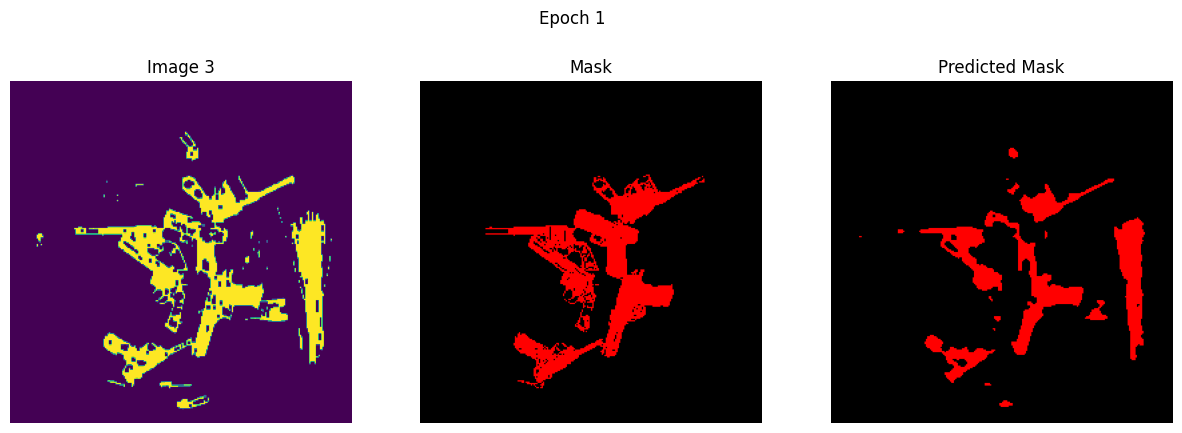

58/58 [==============================] - 26s 269ms/step - loss: 0.3991 - Accuracy: 0.9788 - one_hot_mean_io_u: 0.4894
Epoch 2/15
1/1 [==============================] - 0s 20ms/steploss: 0.0951 - Accuracy: 0.9061 - one_hot_mean_io_u: 0.45


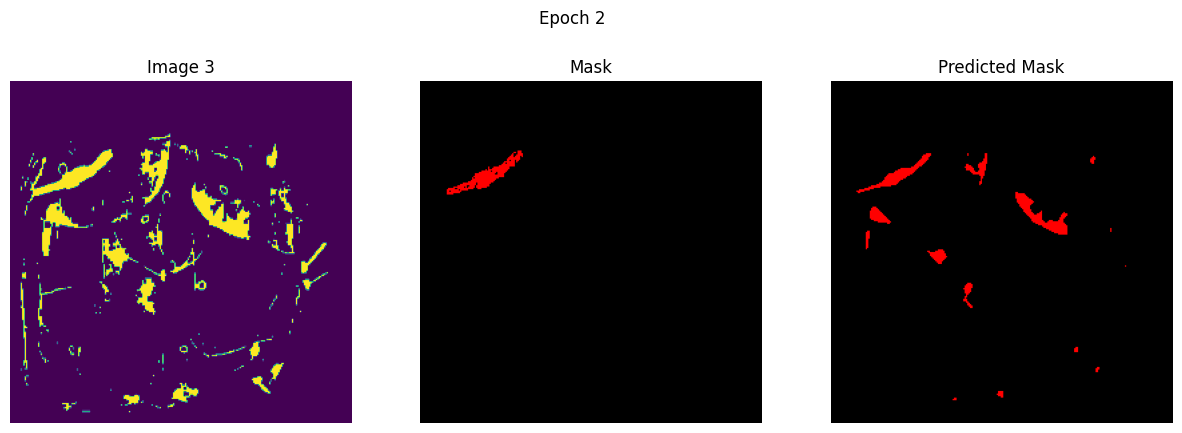

58/58 [==============================] - 14s 233ms/step - loss: 0.0951 - Accuracy: 0.9061 - one_hot_mean_io_u: 0.4531
Epoch 3/15
1/1 [==============================] - 0s 21ms/steploss: 0.0949 - Accuracy: 0.9158 - one_hot_mean_io_u: 0.45


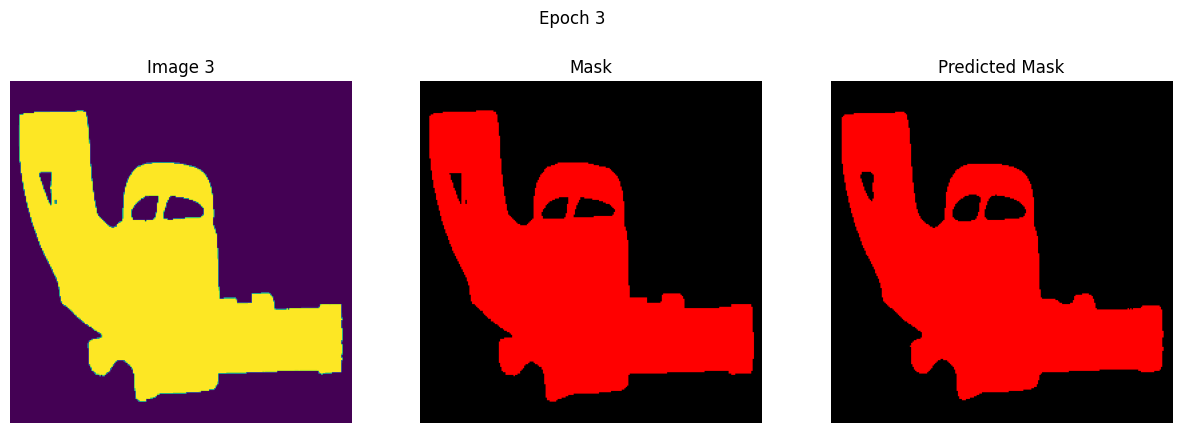

58/58 [==============================] - 14s 233ms/step - loss: 0.0949 - Accuracy: 0.9158 - one_hot_mean_io_u: 0.4579
Epoch 4/15
1/1 [==============================] - 0s 21ms/steploss: 0.0951 - Accuracy: 0.9198 - one_hot_mean_io_u: 0.45


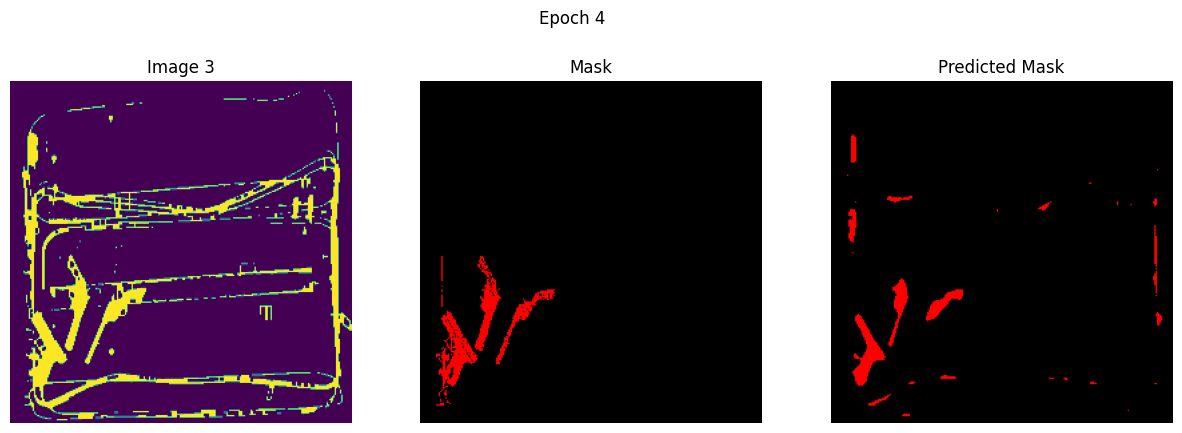

58/58 [==============================] - 14s 235ms/step - loss: 0.0951 - Accuracy: 0.9198 - one_hot_mean_io_u: 0.4599
Epoch 5/15
1/1 [==============================] - 0s 21ms/steploss: 0.1040 - Accuracy: 0.9200 - one_hot_mean_io_u: 0.46


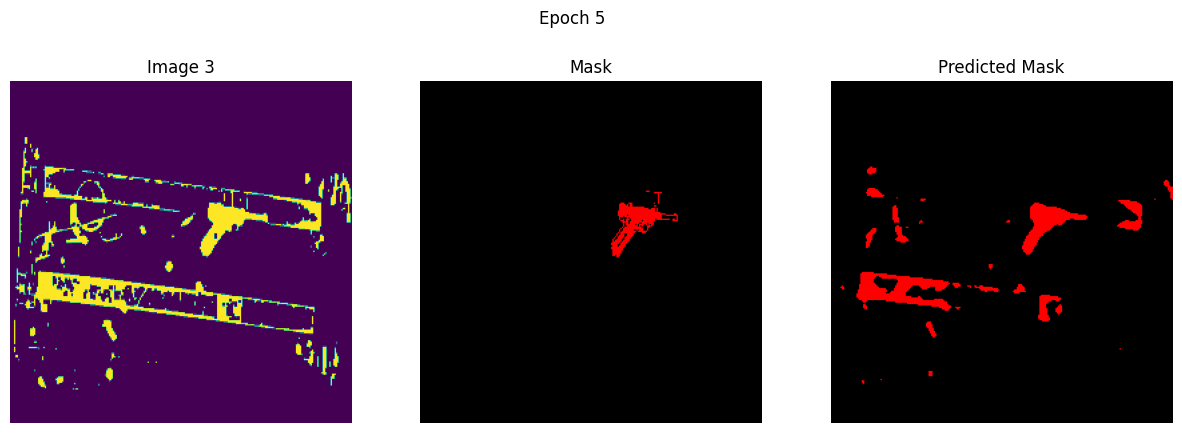

58/58 [==============================] - 14s 233ms/step - loss: 0.1040 - Accuracy: 0.9200 - one_hot_mean_io_u: 0.4600
Epoch 6/15
1/1 [==============================] - 0s 21ms/steploss: 0.1886 - Accuracy: 0.9320 - one_hot_mean_io_u: 0.46


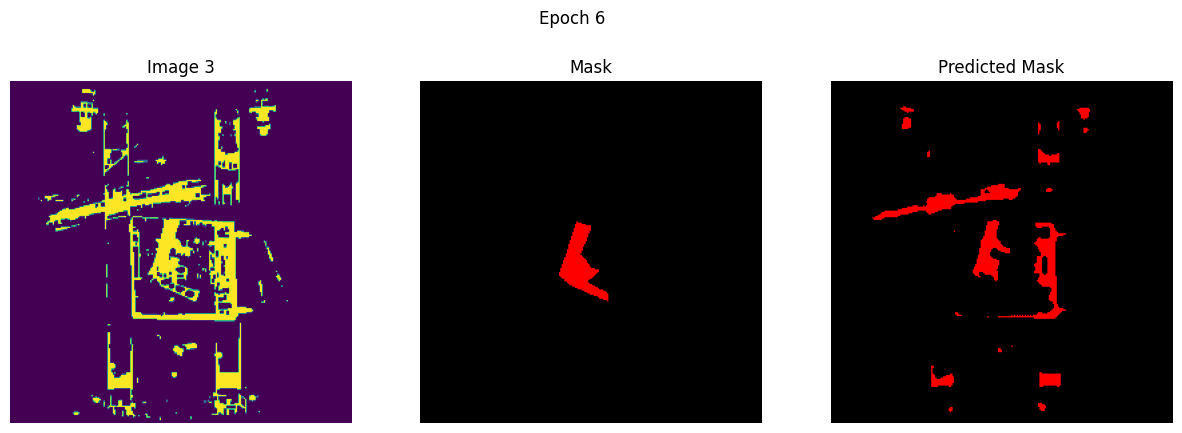

58/58 [==============================] - 14s 233ms/step - loss: 0.1886 - Accuracy: 0.9320 - one_hot_mean_io_u: 0.4660
Epoch 7/15
1/1 [==============================] - 0s 20ms/steploss: 0.0919 - Accuracy: 0.9206 - one_hot_mean_io_u: 0.46


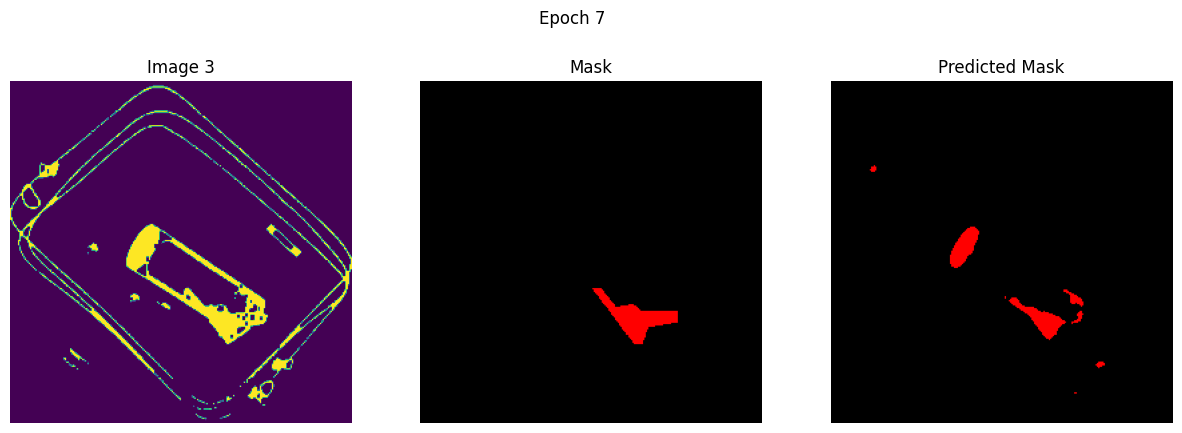

58/58 [==============================] - 14s 237ms/step - loss: 0.0919 - Accuracy: 0.9206 - one_hot_mean_io_u: 0.4603
Epoch 8/15
1/1 [==============================] - 0s 22ms/steploss: 0.0889 - Accuracy: 0.9230 - one_hot_mean_io_u: 0.46


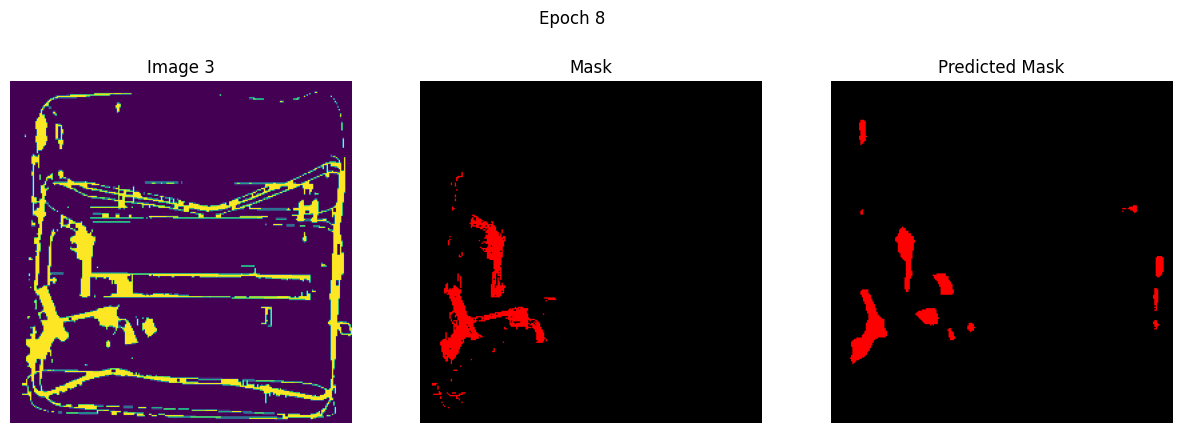

58/58 [==============================] - 14s 234ms/step - loss: 0.0889 - Accuracy: 0.9230 - one_hot_mean_io_u: 0.4615
Epoch 9/15
1/1 [==============================] - 0s 23ms/steploss: 0.0859 - Accuracy: 0.9204 - one_hot_mean_io_u: 0.46


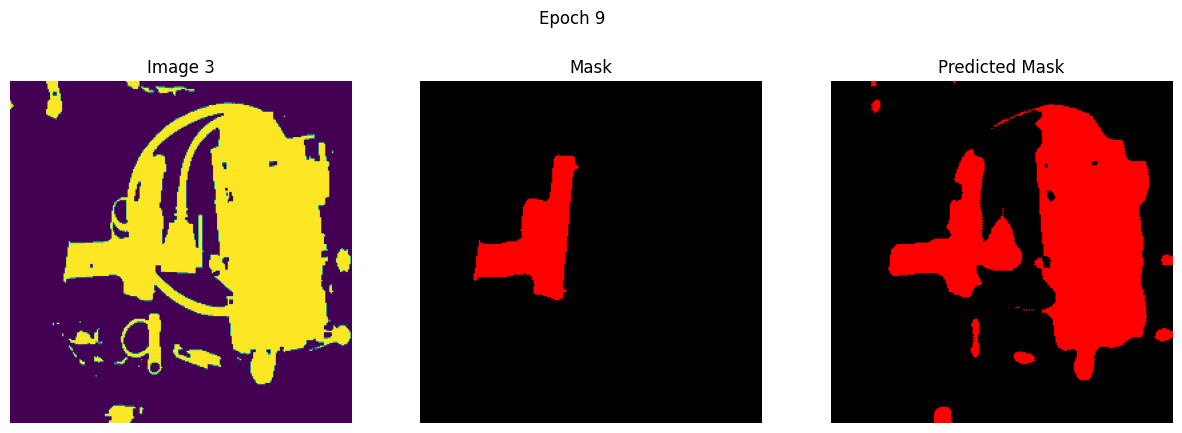

58/58 [==============================] - 14s 242ms/step - loss: 0.0859 - Accuracy: 0.9204 - one_hot_mean_io_u: 0.4602
Epoch 10/15
1/1 [==============================] - 0s 25ms/steploss: 0.0855 - Accuracy: 0.9203 - one_hot_mean_io_u: 0.46


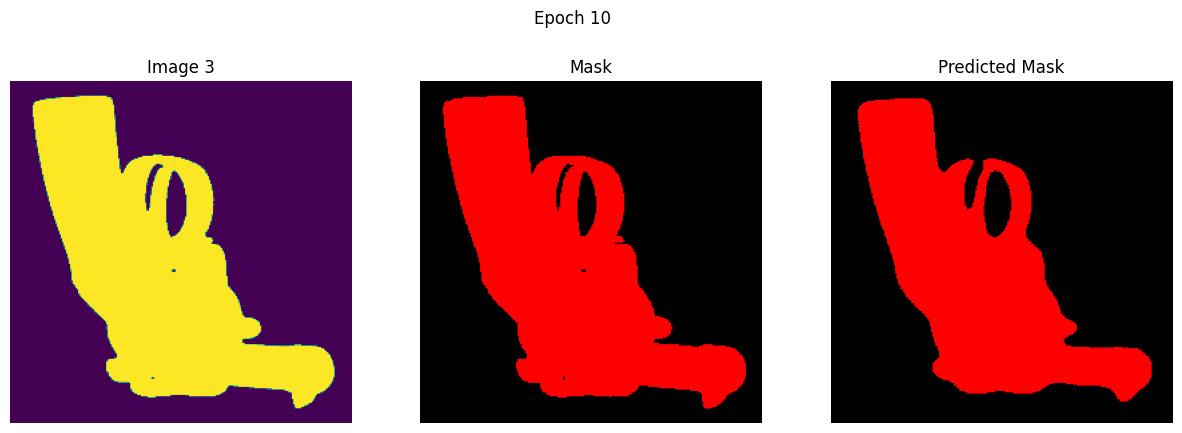

58/58 [==============================] - 14s 234ms/step - loss: 0.0855 - Accuracy: 0.9203 - one_hot_mean_io_u: 0.4601
Epoch 11/15
1/1 [==============================] - 0s 21ms/steploss: 0.0959 - Accuracy: 0.9129 - one_hot_mean_io_u: 0.45


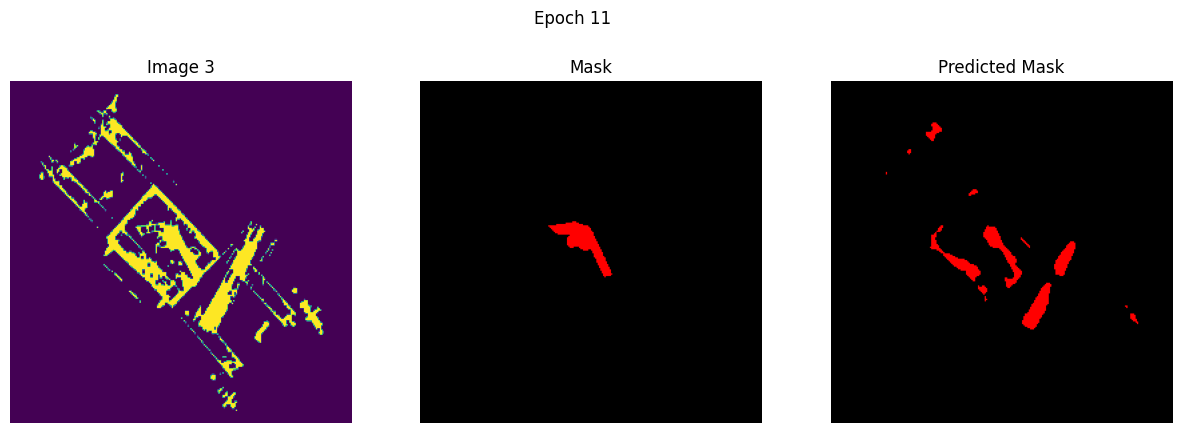

58/58 [==============================] - 14s 234ms/step - loss: 0.0959 - Accuracy: 0.9129 - one_hot_mean_io_u: 0.4565
Epoch 12/15
1/1 [==============================] - 0s 24ms/steploss: 0.0910 - Accuracy: 0.9276 - one_hot_mean_io_u: 0.46


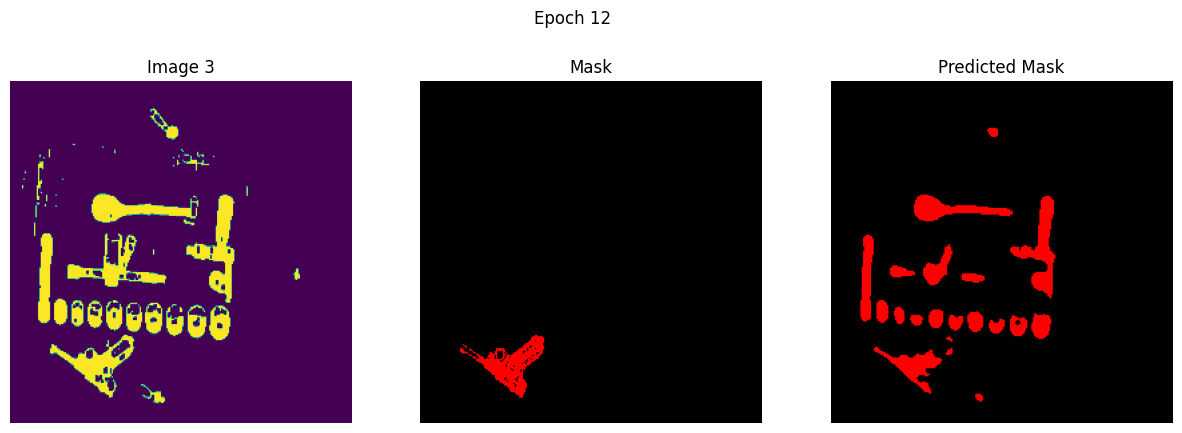

58/58 [==============================] - 14s 234ms/step - loss: 0.0910 - Accuracy: 0.9276 - one_hot_mean_io_u: 0.4638
Epoch 13/15
1/1 [==============================] - 0s 22ms/steploss: 0.0922 - Accuracy: 0.9191 - one_hot_mean_io_u: 0.45


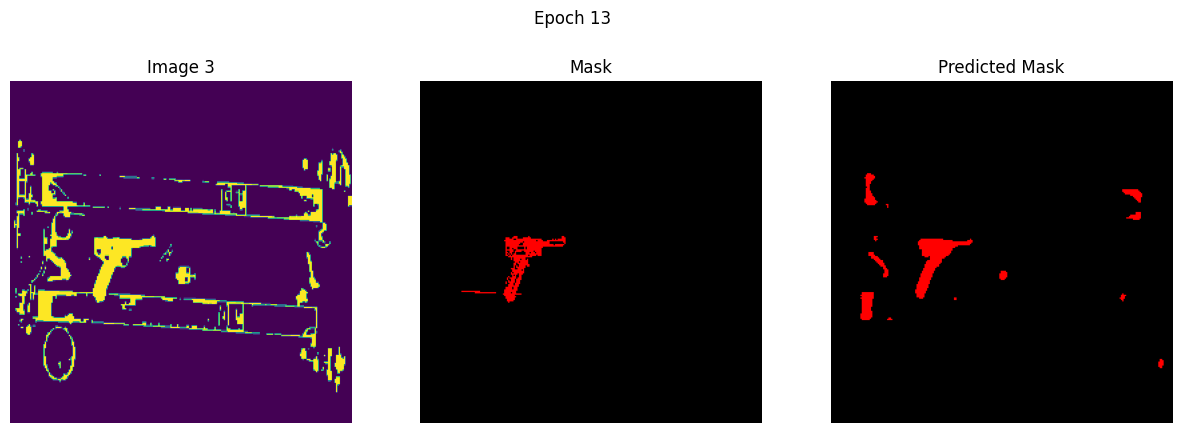

58/58 [==============================] - 14s 236ms/step - loss: 0.0922 - Accuracy: 0.9191 - one_hot_mean_io_u: 0.4596
Epoch 14/15
1/1 [==============================] - 0s 20ms/steploss: 0.0872 - Accuracy: 0.9217 - one_hot_mean_io_u: 0.46


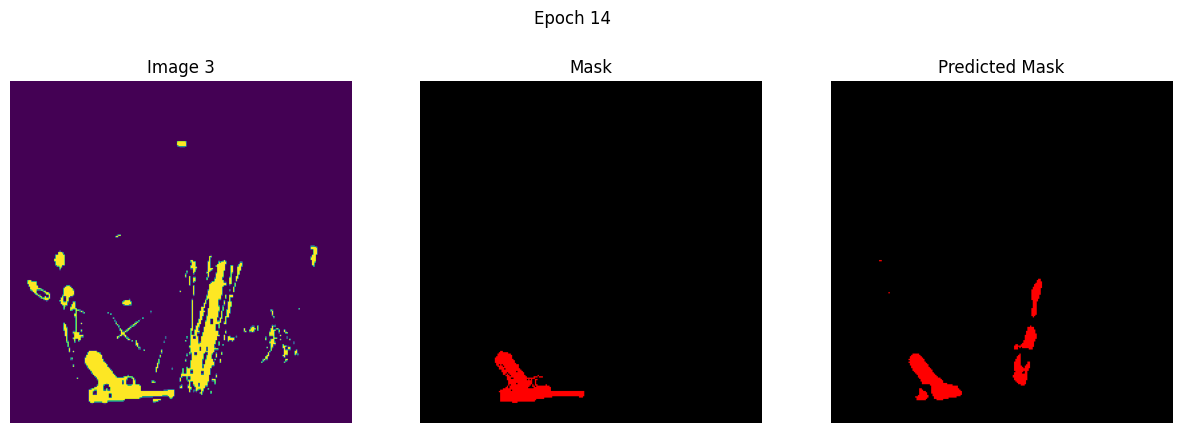

58/58 [==============================] - 14s 233ms/step - loss: 0.0872 - Accuracy: 0.9217 - one_hot_mean_io_u: 0.4608
Epoch 15/15
1/1 [==============================] - 0s 22ms/steploss: 0.0867 - Accuracy: 0.9226 - one_hot_mean_io_u: 0.46


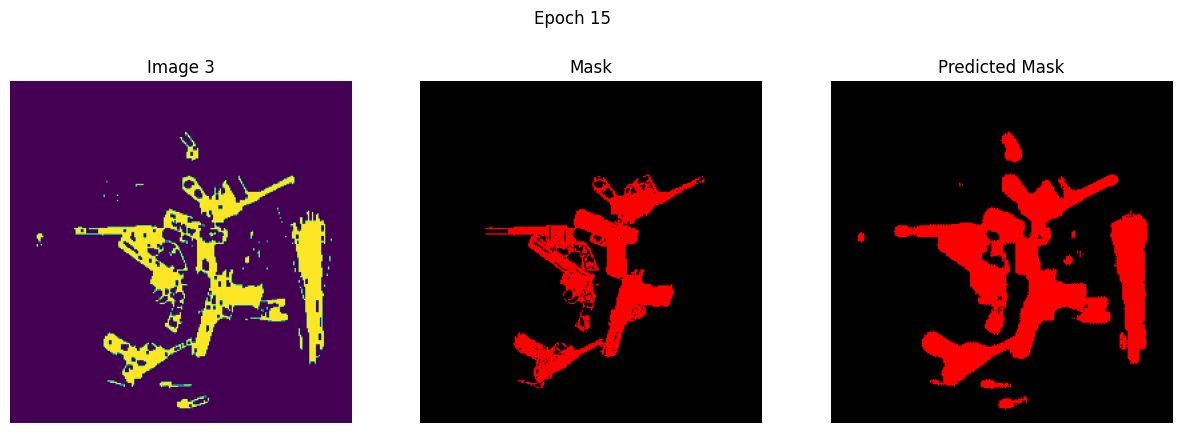

58/58 [==============================] - 14s 236ms/step - loss: 0.0867 - Accuracy: 0.9226 - one_hot_mean_io_u: 0.4613


In [ ]:
callbacks = [VisualizeEpoch(img_num=3)]
# Train the model
history = model.fit(
    train_generator,
    epochs=15,
    callbacks = callbacks
)

In [ ]:
model.save("./gun_segmentation_model.h5")

In [ ]:
# Evaluate on validation data
# loss, accuracy = model.evaluate(val_generator)
# print(f"Validation Loss: {loss}")
# print(f"Validation Accuracy: {accuracy}")

# Predict on a new image
def predict_and_display(model, image_path):
    image = cv2.imread(image_path)
    image_resized = cv2.resize(image, (128, 128))
    image_normalized = image_resized / 255.0
    image_batch = np.expand_dims(image_normalized, axis=0)

    prediction = model.predict(image_batch)[0]
    prediction_resized = cv2.resize(prediction, (image.shape[1], image.shape[0]))

    # Show the image and the prediction
    # cv2.imshow('Image.png', image)
    cv2.imwrite('Prediction.png', np.argmax(prediction_resized, axis=-1))
    cv2.waitKey(0)
    cv2.destroyAllWindows()

# Example usage
predict_and_display(model, 'edges_combined/P00017.png')

SyntaxError: unterminated string literal (detected at line 6) (3070863522.py, line 6)